# Simulación de Robot con Autómata Celular para Evasión de Obstáculos

Este proyecto implementa una simulación de un robot móvil simple, modelado mediante un autómata celular no uniforme, cuyo objetivo es desplazarse en un entorno bidimensional evitando obstáculos.

## Descripción del sistema

El entorno se representa como una cuadrícula (`grid`) de tamaño fijo, donde cada celda puede estar en uno de dos estados:

- `0`: Celda libre (espacio disponible para moverse)
- `1`: Obstáculo fijo (no se puede atravesar)

El robot es un agente autónomo que ocupa una única celda, tiene una **dirección** (Norte, Este, Sur u Oeste) y decide su próximo movimiento según el contenido de la celda que tiene al frente.

## Reglas de comportamiento del robot

- Si la celda al frente está **libre**: avanza una celda en esa dirección.
- Si la celda al frente está **ocupada por un obstáculo o fuera de los límites**: gira aleatoriamente a la izquierda o a la derecha.
- El robot **nunca sobrescribe obstáculos**, ya que se representa de forma separada al entorno.

Este comportamiento simula un sistema **reactivo basado en reglas locales**, típico en aplicaciones de robótica móvil simple o en agentes de simulación.

## Visualización

Cada paso de la simulación se muestra usando `matplotlib`, donde:

- Las celdas **blancas** representan espacios libres.
- Las celdas **negras** son obstáculos.
- El **robot** se muestra en **azul**, con su posición actual en el entorno.

El título de la figura indica el número de paso actual.

## Objetivo

El objetivo de esta simulación es mostrar cómo un autómata celular no uniforme puede modelar un comportamiento emergente de evasión de obstáculos, usando reglas simples y decisiones locales. Esta es una técnica aplicable tanto en inteligencia artificial distribuida como en control de minirobots.

---


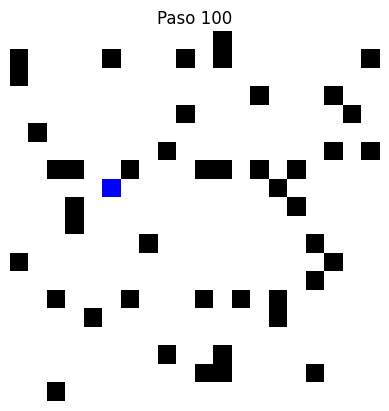

In [6]:
#FRANCISCO JOSSE ROJAS ROJAS
#YEIRA LISETH RODRIGUEZ RODRIGUEZ
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from IPython.display import clear_output
import time

# --- Definiciones ---
FREE = 0
OBSTACLE = 1

# Direcciones del robot
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3

# Colores: blanco (libre), negro (obstáculo), azul (robot)
cmap = mcolors.ListedColormap(['white', 'black', 'blue'])

# --- Entorno inicial ---
grid_size = 20
env = np.zeros((grid_size, grid_size), dtype=int)

np.random.seed(42)
for _ in range(50):
    x, y = np.random.randint(0, grid_size, 2)
    env[x, y] = OBSTACLE

# --- Estado del robot ---
robot_pos = [grid_size // 2, grid_size // 2]
robot_dir = UP

# --- Funciones de dirección ---
direction_map = {
    UP: (-1, 0),
    RIGHT: (0, 1),
    DOWN: (1, 0),
    LEFT: (0, -1)
}

def turn_right(d): return (d + 1) % 4
def turn_left(d): return (d - 1) % 4

# --- Visualización ---
def show(grid, robot_pos, step):
    display_grid = grid.copy()
    rx, ry = robot_pos
    display_grid[rx, ry] = 2  # Coloreamos el robot sin alterar el grid real

    plt.imshow(display_grid, cmap=cmap)
    plt.title(f"Paso {step}")
    plt.axis('off')
    plt.show()

# --- Simulación ---
steps = 100 #SE PUEDE AGREGAR MÁS PASOS SI SE QUIERE

for t in range(steps):
    clear_output(wait=True)

    dx, dy = direction_map[robot_dir]
    nx, ny = robot_pos[0] + dx, robot_pos[1] + dy

    # Verifica si la celda al frente es libre y válida
    if 0 <= nx < grid_size and 0 <= ny < grid_size and env[nx, ny] == FREE:
        robot_pos = [nx, ny]
    else:
        # Gira aleatoriamente a derecha o izquierda
        robot_dir = turn_right(robot_dir) if np.random.rand() > 0.5 else turn_left(robot_dir)

    # Mostrar entorno + robot
    show(env, robot_pos, t + 1)
    time.sleep(0.2)